In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json

In [33]:
instances=json.load(open('instances_val.json'))

In [35]:
len(instances["annotations"])

9630

In [11]:
images_path = os.listdir("TestSample")

In [12]:
images_path

['3387.jpg',
 '3379.jpg',
 '3336.jpg',
 '3466.jpg',
 '3467.jpg',
 '3465.jpg',
 '3464.jpg',
 '3372.jpg']

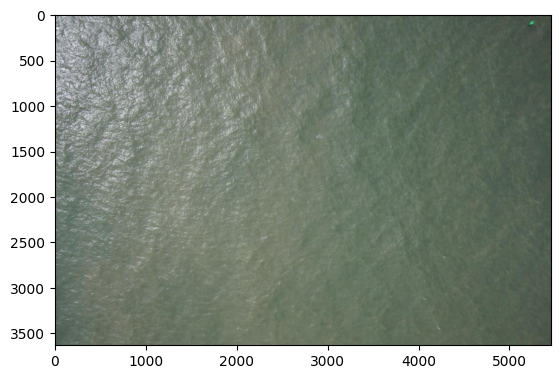

In [30]:
plt.imshow(plt.imread(os.path.join("TestSample", images_path[0])))

Personne
Personne
Personne
Personne
Personne
Personne


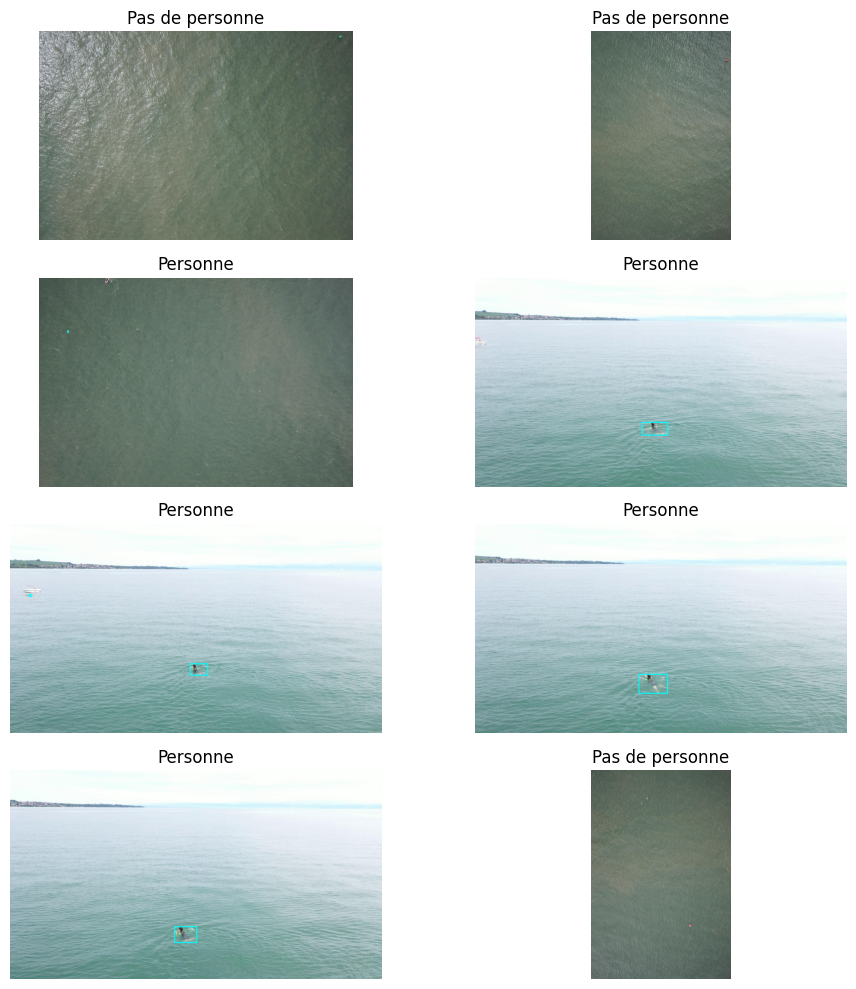

In [56]:
fig, ax = plt.subplots(len(images_path) // 2, 2, figsize=(10, 10))

ax = ax.ravel() if len(images_path) > 1 else [ax]

for i, image_path in enumerate(images_path):
    image = cv2.imread(os.path.join("TestSample", image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    trouve=False
    for annotation in instances["annotations"]:
        if int(image_path.split(".")[0]) == annotation["image_id"] and annotation["category_id"] == 1:
            bbox = annotation["bbox"]
            cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), 
                          (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])), 
                          (0, 255, 255), 10)
            #print("Personne")
            ax[i].set_title("Personne")
            trouve=True
    if not trouve:
        ax[i].set_title("Pas de personne")
    ax[i].imshow(image)
    ax[i].axis('off') 

plt.tight_layout()
plt.show()

In [12]:
def data_parser(data_path,name="data_parsed.json"):
  data_parsed={}
  data=json.load(open(data_path))
  for image_data in data["images"]:
    image_id=image_data["id"]
    height=image_data["height"]
    width=image_data["width"]
    file_name=image_data["file_name"]
    annotations_list = []
    for annotation in data["annotations"]:
        if annotation["image_id"]==image_id:
            annotations_list.append({"category_id":annotation["category_id"],"bbox":annotation["bbox"]})
    if len(annotations_list)==0:
        annotations_list.append({"category_id":0,"bbox":[0,0,0,0]})
    data_parsed[image_id]={"file_name":file_name,"height":height,"width":width,"annotations":annotations_list}
    json.dump(data_parsed,open(name,"w"))

data_parser("instances_val.json","data_parsed.json")

In [13]:
data_parsed=json.load(open("data_parsed.json"))

In [14]:
labels_dic={"ignored":0,"swimmer":1,"boat":2,"jetski":3,"life_saving_appliances":4,"buoy":5}
labels_list=["ignored","swimmer","boat","jetski","life_saving_appliances","buoy"]

[0, 6206, 2214, 320, 330, 560]


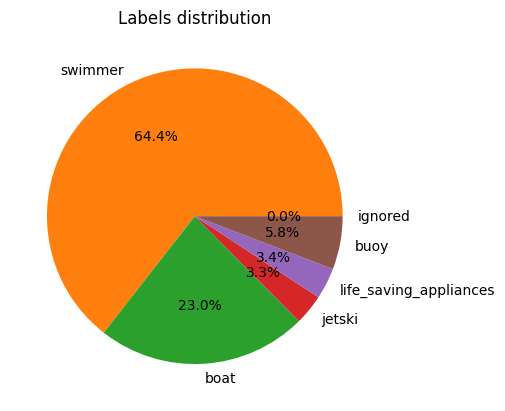

In [16]:
labels_count=[0,0,0,0,0,0]
for image_id in data_parsed:
    if len(data_parsed[image_id]["annotations"])==0:
        labels_count[0]+=1
    for annotation in data_parsed[image_id]["annotations"]:
        labels_count[annotation["category_id"]]+=1
print(labels_count)
plt.pie(labels_count,labels=labels_list,autopct='%1.1f%%')
plt.title("Labels distribution")
plt.show()